#### Copyright (C) 2022 Sobhan Moradian Daghigh
#### Date: 2/2/2022

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import os

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import string
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk import pos_tag
# import nltk
# nltk.download('stopwords')
# nltk.download('punkt')

from IPython.display import display

import import_ipynb, importlib, sys
import feature_selection_methods as FS
import classifier_models as models
def reload_moduls():
    importlib.reload(sys.modules['feature_selection_methods'])
    importlib.reload(sys.modules['classifier_models'])
    import feature_selection_methods as FS
    import classifier_models as models
    
    return FS, models

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image

importing Jupyter notebook from feature_selection_methods.ipynb
importing Jupyter notebook from classifier_models.ipynb


### Loading Datasets

In [2]:
def load_datasets(path):
    datasets = []
    print('Loading the datasets..\n')
    for root, dirs, files in os.walk(path):
        for i, file in enumerate(files):
            print(' |_  {}. {} loaded'.format(i + 1, file.split('.')[0]))
            datasets.append(pd.read_csv(os.path.join(root, file), names=['sentence', 'label'], sep='\t'))
    return datasets

In [3]:
datasets_name = ['Amazon', 'IMDB  ', 'Yelp  ']
datasets = load_datasets('./Datasets/KDD2015/')

Loading the datasets..

 |_  1. amazon loaded
 |_  2. imdb loaded
 |_  3. yelp loaded


In [4]:
# Amazon
datasets[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  1000 non-null   object
 1   label     1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [5]:
# IMDB
datasets[1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  1000 non-null   object
 1   label     1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [6]:
# Yelp
datasets[2].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  1000 non-null   object
 1   label     1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


### Make a preprocess on the comments to improve quality and remove unneccessary words
##### 1. convert all words to lowercase
##### 2. remove punctuations
##### 3. tonekize words
##### 4. remove stopwords
##### 5. use porterStemmer to have stemming words

In [7]:
def nlprocess(dataset):
    
    preprocessed_comments = []
    for text in dataset:
        
        #Lowercase
        text = text.lower()

        # Removing Punctuation
        text = "".join([char for char in text if char not in string.punctuation])

        # Word Tokenization
        text = word_tokenize(text)

        # Stopword Filtering
        stop_words = stopwords.words('english')
        text = [word for word in text if word not in stop_words]

        # Stemming
        porter = PorterStemmer()
        text = [porter.stem(word) for word in text]

        text = ' '.join(text)

        preprocessed_comments.append(text)
        
    return preprocessed_comments

### Splitting the datasets into Train and Test

In [8]:
def spliter(datasets):
    x_train_datasets, x_test_datasets, y_train_datasets, y_test_datasets = [], [], [], []
    print('(train, test):')
    for i, dataset in enumerate(datasets):
        x_train, x_test, y_train, y_test = train_test_split(dataset.sentence, dataset.label, test_size=0.3, random_state=42)
        x_train_datasets.append(nlprocess(x_train))
        x_test_datasets.append(nlprocess(x_test))
        y_train_datasets.append(y_train)
        y_test_datasets.append(y_test)
        print(' |_ {}: ({}, {})'.format(datasets_name[i], len(x_train), len(x_test)))
    return x_train_datasets, x_test_datasets, y_train_datasets, y_test_datasets

In [9]:
x_train_datasets, x_test_datasets, y_train_datasets, y_test_datasets = spliter(datasets)

(train, test):
 |_ Amazon: (700, 300)
 |_ IMDB  : (700, 300)
 |_ Yelp  : (700, 300)


### Feature Extraction using TF-IDF

In [10]:
def feature_extractor(dataset):
    vectorizer = TfidfVectorizer()
    vectorizer.fit(dataset)
    return vectorizer

In [11]:
def get_top_frequent_features(vectorizer):
    df = pd.DataFrame({'words': vectorizer.vocabulary_.keys(), 'counts': vectorizer.vocabulary_.values()})
    print('\n------ {} ------'.format(datasets_name[i]))
    display(df.sort_values(by=['counts'], ascending=False).head())

#### Top 5 frequent words of each dataset to get a full feeling of the problem

In [12]:
def wordcloud(data):
    mask = np.array(Image.open('./panda.jpg'))
    wordcloud = WordCloud(
        mask=mask,
        background_color='white',
        max_words=1000,
        max_font_size=60,
        scale=3,
        random_state=1
    ).generate_from_frequencies(data)

    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()


------ Amazon ------


,words,counts
999,zero,1197
566,z500a,1196
559,youd,1195
1117,yet,1194
1031,yell,1193


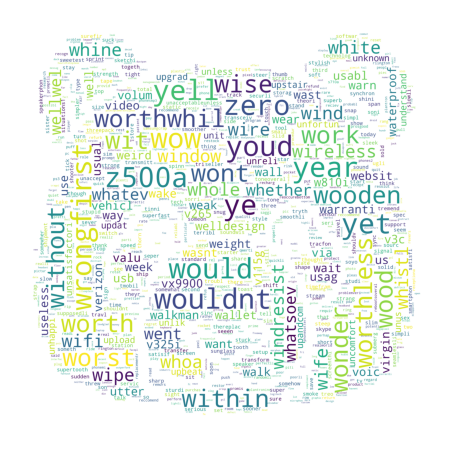


------ IMDB   ------


,words,counts
1200,zombiez,2064
1483,zombi,2063
1810,zillion,2062
1262,yun,2061
633,your,2060


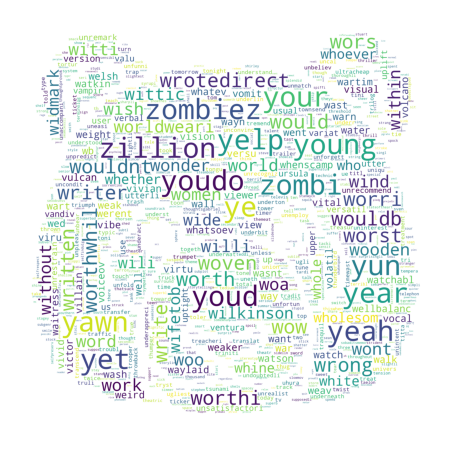


------ Yelp   ------


,words,counts
682,zero,1330
836,yummi,1329
745,yum,1328
591,yucki,1327
892,your,1326


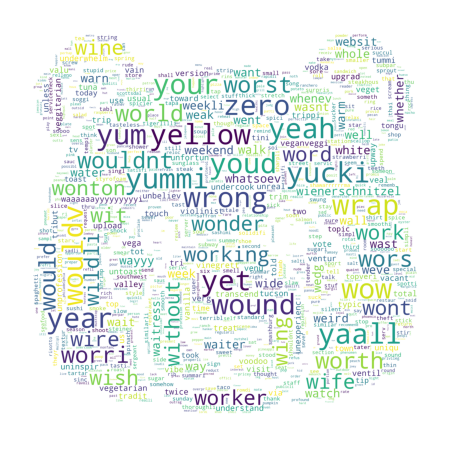

In [13]:
# Display
vectorizers = []
for i, dataset in enumerate(x_train_datasets):
    vectorizer = feature_extractor(dataset)
    get_top_frequent_features(vectorizer)
    wordcloud(vectorizer.vocabulary_)   
    vectorizers.append(vectorizer)

### Logistic Regression
#### - Without FS

In [14]:
print("Accuracy:")
clfs = []
vectorized_trains = []
vectorized_tests = []

for i, (vec, x_tr, x_ts, y_tr, y_ts) in enumerate(zip(vectorizers, x_train_datasets, x_test_datasets, y_train_datasets, y_test_datasets)):
    X_train = vec.transform(x_tr)
    X_test = vec.transform(x_ts)

    vectorized_trains.append(X_train)
    vectorized_tests.append(X_test)
    
    clf = LogisticRegression()
    clf.fit(X_train, y_tr)
    clfs.append(clf)
    score = clf.score(X_test, y_ts)
    
    print(' |_  {}: {:.2f}'.format(datasets_name[i], score))

Accuracy:
 |_  Amazon: 0.81
 |_  IMDB  : 0.81
 |_  Yelp  : 0.77


### Apply the selected features to datasets

In [15]:
def apply_selected_features(datasets, tops):
    filter_datasets = []
    for dataset, top in zip(datasets, tops):
        filter_dataset = np.array(np.take(dataset.todense(), top, axis=1))
        filter_datasets.append(filter_dataset)
    return filter_datasets

### Display the top features

In [16]:
def display_tops(tops, vectorizers):
    for i, (top, vec) in enumerate(zip(tops, vectorizers)):
        name = np.array(vec.get_feature_names_out())[top].tolist()
        print('\n{}:'.format(datasets_name[i]))
        display(pd.DataFrame(name).head())

In [17]:
# Including the features which are selected by different FS methods
fs_tops = []
fs_methods_name = ['Odd-Ratio', 'Chi-Square', 'GSS', 'Count-Difference']

### 1. Odd Ratio FS

In [18]:
# Reload the sub_modules to apply changes
FS, models = reload_moduls()

odd_ratio_tops = FS.odd_ratio(clfs)
fs_tops.append(odd_ratio_tops)
display_tops(odd_ratio_tops, vectorizers)

importing Jupyter notebook from feature_selection_methods.ipynb
importing Jupyter notebook from classifier_models.ipynb
(Main, Selected) Features size:
 |_ Amazon: (1198, 535)
 |_ IMDB  : (2065, 1153)
 |_ Yelp  : (1331, 628)

Amazon:


,0
0,great
1,good
2,nice
3,love
4,best



IMDB  :


,0
0,love
1,great
2,excel
3,beauti
4,wonder



Yelp  :


,0
0,great
1,delici
2,good
3,love
4,amaz


### 2. Chi-Square FS

In [19]:
# Reload the sub_modules to apply changes
FS, models = reload_moduls()

chi_tops = FS.chi_square(vectorized_trains, y_train_datasets)
fs_tops.append(chi_tops)
display_tops(chi_tops, vectorizers)

importing Jupyter notebook from feature_selection_methods.ipynb
importing Jupyter notebook from classifier_models.ipynb
(Main, Selected) Features size:
 |_ Amazon: (1198, 223)
 |_ IMDB  : (2065, 228)
 |_ Yelp  : (1331, 222)

Amazon:


,0
0,great
1,disappoint
2,wast
3,love
4,excel



IMDB  :


,0
0,bad
1,love
2,great
3,aw
4,plot



Yelp  :


,0
0,great
1,delici
2,love
3,dont
4,awesom


### 3. GSS FS

In [20]:
# Reload the sub_modules to apply changes
FS, models = reload_moduls()

classes_vectorizers = []
for i, (x_train, y_train) in enumerate(zip(x_train_datasets, y_train_datasets)):
    classes = []
    groups = pd.DataFrame({'text': x_train, 'label': y_train}).groupby(by='label')
    for grp, pdf in groups:
        vectorizer = feature_extractor(pdf.iloc[:, 0])
        classes.append(vectorizer)
    
    classes_vectorizers.append(classes)
    
gss_tops = FS.gss(vectorizers, classes_vectorizers, y_train_datasets)
fs_tops.append(gss_tops)
display_tops(gss_tops, vectorizers)

importing Jupyter notebook from feature_selection_methods.ipynb
importing Jupyter notebook from classifier_models.ipynb
(Main, Selected) Features size:
 |_ Amazon: (1198, 632)
 |_ IMDB  : (2065, 1166)
 |_ Yelp  : (1331, 715)

Amazon:


,0
0,itmi
1,invent
2,steer
3,key
4,loos



IMDB  :


,0
0,muppet
1,rendit
2,thought
3,oconnor
4,requir



Yelp  :


,0
0,pleas
1,name
2,massiv
3,mein
4,busi


### 4. Count Difference FS

In [21]:
# Reload the sub_modules to apply changes
FS, models = reload_moduls()

cd_tops = FS.count_diff(vectorized_trains, y_train_datasets)
fs_tops.append(cd_tops)
display_tops(cd_tops, vectorizers)

importing Jupyter notebook from feature_selection_methods.ipynb
importing Jupyter notebook from classifier_models.ipynb
(Main, Selected) Features size:
 |_ Amazon: (1198, 285)
 |_ IMDB  : (2065, 291)
 |_ Yelp  : (1331, 281)

Amazon:


,0
0,great
1,disappoint
2,good
3,price
4,wast



IMDB  :


,0
0,bad
1,love
2,great
3,plot
4,aw



Yelp  :


,0
0,great
1,good
2,delici
3,love
4,dont


### ------------------------------------------------------------    Models    ---------------------------------------------------

### Logistic Regression

In [22]:
# Reload the sub_modules to apply changes
FS, models = reload_moduls()

for i, tops in enumerate(fs_tops):
    print('\nFS: {}'.format(fs_methods_name[i]))
    filtered_datasets_trains = apply_selected_features(vectorized_trains, tops)
    filtered_datasets_tests = apply_selected_features(vectorized_tests, tops)
    models.logestic_regression(filtered_datasets_trains, filtered_datasets_tests, y_train_datasets, y_test_datasets)

importing Jupyter notebook from feature_selection_methods.ipynb
importing Jupyter notebook from classifier_models.ipynb

FS: Odd-Ratio
             acc  -  f1
 |_  Amazon: 0.79 - 0.77
 |_  IMDB  : 0.72 - 0.68
 |_  Yelp  : 0.74 - 0.70

FS: Chi-Square
             acc  -  f1
 |_  Amazon: 0.77 - 0.76
 |_  IMDB  : 0.72 - 0.71
 |_  Yelp  : 0.77 - 0.75

FS: GSS
             acc  -  f1
 |_  Amazon: 0.76 - 0.74
 |_  IMDB  : 0.74 - 0.73
 |_  Yelp  : 0.71 - 0.69

FS: Count-Difference
             acc  -  f1
 |_  Amazon: 0.79 - 0.79
 |_  IMDB  : 0.74 - 0.74
 |_  Yelp  : 0.78 - 0.76


### Linear SVM

In [23]:
# Reload the sub_modules to apply changes
FS, models = reload_moduls()

for i, tops in enumerate(fs_tops):
    print('\nFS: {}'.format(fs_methods_name[i]))
    filtered_datasets_trains = apply_selected_features(vectorized_trains, tops)
    filtered_datasets_tests = apply_selected_features(vectorized_tests, tops)
    models.linear_svm(filtered_datasets_trains, filtered_datasets_tests, y_train_datasets, y_test_datasets)

importing Jupyter notebook from feature_selection_methods.ipynb
importing Jupyter notebook from classifier_models.ipynb

FS: Odd-Ratio
             acc  -  f1
 |_  Amazon: 0.80 - 0.79
 |_  IMDB  : 0.72 - 0.70
 |_  Yelp  : 0.75 - 0.72

FS: Chi-Square
             acc  -  f1
 |_  Amazon: 0.78 - 0.77
 |_  IMDB  : 0.73 - 0.72
 |_  Yelp  : 0.75 - 0.73

FS: GSS
             acc  -  f1
 |_  Amazon: 0.75 - 0.73
 |_  IMDB  : 0.73 - 0.74
 |_  Yelp  : 0.70 - 0.68

FS: Count-Difference
             acc  -  f1
 |_  Amazon: 0.80 - 0.80
 |_  IMDB  : 0.74 - 0.74
 |_  Yelp  : 0.74 - 0.72


### RBF SVM

In [24]:
# Reload the sub_modules to apply changes
FS, models = reload_moduls()

for i, tops in enumerate(fs_tops):
    print('\nFS: {}'.format(fs_methods_name[i]))
    filtered_datasets_trains = apply_selected_features(vectorized_trains, tops)
    filtered_datasets_tests = apply_selected_features(vectorized_tests, tops)
    models.rbf_svm(filtered_datasets_trains, filtered_datasets_tests, y_train_datasets, y_test_datasets)

importing Jupyter notebook from feature_selection_methods.ipynb
importing Jupyter notebook from classifier_models.ipynb

FS: Odd-Ratio
             acc  -  f1
 |_  Amazon: 0.79 - 0.78
 |_  IMDB  : 0.77 - 0.79
 |_  Yelp  : 0.72 - 0.70

FS: Chi-Square
             acc  -  f1
 |_  Amazon: 0.79 - 0.78
 |_  IMDB  : 0.76 - 0.80
 |_  Yelp  : 0.75 - 0.73

FS: GSS
             acc  -  f1
 |_  Amazon: 0.75 - 0.73
 |_  IMDB  : 0.76 - 0.76
 |_  Yelp  : 0.72 - 0.71

FS: Count-Difference
             acc  -  f1
 |_  Amazon: 0.79 - 0.79
 |_  IMDB  : 0.76 - 0.79
 |_  Yelp  : 0.76 - 0.73


### Decision Tree

In [25]:
# Reload the sub_modules to apply changes
FS, models = reload_moduls()

for i, tops in enumerate(fs_tops):
    print('\nFS: {}'.format(fs_methods_name[i]))
    filtered_datasets_trains = apply_selected_features(vectorized_trains, tops)
    filtered_datasets_tests = apply_selected_features(vectorized_tests, tops)
    models.decision_tree(filtered_datasets_trains, filtered_datasets_tests, y_train_datasets, y_test_datasets)

importing Jupyter notebook from feature_selection_methods.ipynb
importing Jupyter notebook from classifier_models.ipynb

FS: Odd-Ratio
             acc  -  f1
 |_  Amazon: 0.76 - 0.73
 |_  IMDB  : 0.61 - 0.49
 |_  Yelp  : 0.73 - 0.66

FS: Chi-Square
             acc  -  f1
 |_  Amazon: 0.75 - 0.71
 |_  IMDB  : 0.60 - 0.46
 |_  Yelp  : 0.72 - 0.65

FS: GSS
             acc  -  f1
 |_  Amazon: 0.67 - 0.62
 |_  IMDB  : 0.56 - 0.39
 |_  Yelp  : 0.67 - 0.56

FS: Count-Difference
             acc  -  f1
 |_  Amazon: 0.75 - 0.71
 |_  IMDB  : 0.60 - 0.45
 |_  Yelp  : 0.72 - 0.64


### MNB

In [26]:
# Reload the sub_modules to apply changes
FS, models = reload_moduls()

for i, tops in enumerate(fs_tops):
    print('\nFS: {}'.format(fs_methods_name[i]))
    filtered_datasets_trains = apply_selected_features(vectorized_trains, tops)
    filtered_datasets_tests = apply_selected_features(vectorized_tests, tops)
    models.multinomial_naive_bayes(filtered_datasets_trains, filtered_datasets_tests, y_train_datasets, y_test_datasets)

importing Jupyter notebook from feature_selection_methods.ipynb
importing Jupyter notebook from classifier_models.ipynb

FS: Odd-Ratio
             acc  -  f1
 |_  Amazon: 0.73 - 0.73
 |_  IMDB  : 0.67 - 0.64
 |_  Yelp  : 0.58 - 0.61

FS: Chi-Square
             acc  -  f1
 |_  Amazon: 0.80 - 0.80
 |_  IMDB  : 0.72 - 0.70
 |_  Yelp  : 0.76 - 0.77

FS: GSS
             acc  -  f1
 |_  Amazon: 0.75 - 0.74
 |_  IMDB  : 0.78 - 0.78
 |_  Yelp  : 0.73 - 0.74

FS: Count-Difference
             acc  -  f1
 |_  Amazon: 0.81 - 0.81
 |_  IMDB  : 0.73 - 0.73
 |_  Yelp  : 0.74 - 0.74


### BNB

In [27]:
# Reload the sub_modules to apply changes
FS, models = reload_moduls()

for i, tops in enumerate(fs_tops):
    print('\nFS: {}'.format(fs_methods_name[i]))
    filtered_datasets_trains = apply_selected_features(vectorized_trains, tops)
    filtered_datasets_tests = apply_selected_features(vectorized_tests, tops)
    models.bernoulli_naive_bayes(filtered_datasets_trains, filtered_datasets_tests, y_train_datasets, y_test_datasets)

importing Jupyter notebook from feature_selection_methods.ipynb
importing Jupyter notebook from classifier_models.ipynb

FS: Odd-Ratio
             acc  -  f1
 |_  Amazon: 0.72 - 0.66
 |_  IMDB  : 0.53 - 0.24
 |_  Yelp  : 0.67 - 0.51

FS: Chi-Square
             acc  -  f1
 |_  Amazon: 0.79 - 0.80
 |_  IMDB  : 0.74 - 0.71
 |_  Yelp  : 0.76 - 0.77

FS: GSS
             acc  -  f1
 |_  Amazon: 0.75 - 0.74
 |_  IMDB  : 0.71 - 0.66
 |_  Yelp  : 0.73 - 0.75

FS: Count-Difference
             acc  -  f1
 |_  Amazon: 0.81 - 0.81
 |_  IMDB  : 0.74 - 0.72
 |_  Yelp  : 0.76 - 0.76


### Bagging Ensemble

In [28]:
# Reload the sub_modules to apply changes
FS, models = reload_moduls()
classifiers = ['LR', 'SVM-Linear', 'SVM-RBF', 'DT', 'MNB', 'BNB']
print('Bagging Ensemble Classifiers with')

for j, classifier in enumerate(classifiers):
    print('\n----- {} -----'.format(classifiers[j]))
    for i, tops in enumerate(fs_tops):
        print('\nFS: {}'.format(fs_methods_name[i]))
        filtered_datasets_trains = apply_selected_features(vectorized_trains, tops)
        filtered_datasets_tests = apply_selected_features(vectorized_tests, tops)
        models.bagging(filtered_datasets_trains, filtered_datasets_tests, y_train_datasets, y_test_datasets, classifiers[j])

importing Jupyter notebook from feature_selection_methods.ipynb
importing Jupyter notebook from classifier_models.ipynb
Bagging Ensemble Classifiers with

----- LR -----

FS: Odd-Ratio
             acc  -  f1
 |_  Amazon: 0.79 - 0.77
 |_  IMDB  : 0.69 - 0.63
 |_  Yelp  : 0.73 - 0.66

FS: Chi-Square
             acc  -  f1
 |_  Amazon: 0.77 - 0.76
 |_  IMDB  : 0.73 - 0.71
 |_  Yelp  : 0.77 - 0.75

FS: GSS
             acc  -  f1
 |_  Amazon: 0.75 - 0.73
 |_  IMDB  : 0.73 - 0.71
 |_  Yelp  : 0.70 - 0.67

FS: Count-Difference
             acc  -  f1
 |_  Amazon: 0.78 - 0.78
 |_  IMDB  : 0.74 - 0.75
 |_  Yelp  : 0.76 - 0.74

----- SVM-Linear -----

FS: Odd-Ratio
             acc  -  f1
 |_  Amazon: 0.78 - 0.76
 |_  IMDB  : 0.69 - 0.63
 |_  Yelp  : 0.75 - 0.70

FS: Chi-Square
             acc  -  f1
 |_  Amazon: 0.78 - 0.76
 |_  IMDB  : 0.75 - 0.79
 |_  Yelp  : 0.75 - 0.73

FS: GSS
             acc  -  f1
 |_  Amazon: 0.75 - 0.73
 |_  IMDB  : 0.75 - 0.74
 |_  Yelp  : 0.71 - 0.69

FS: Count-

###  Random Subspace Ensemble

In [29]:
# Reload the sub_modules to apply changes
FS, models = reload_moduls()
classifiers = ['LR', 'SVM-Linear', 'SVM-RBF', 'DT', 'MNB', 'BNB']
print('Random Subspace Ensemble Classifiers with')

for j, classifier in enumerate(classifiers):
    print('\n----- {} -----'.format(classifiers[j]))
    for i, tops in enumerate(fs_tops):
        print('\nFS: {}'.format(fs_methods_name[i]))
        filtered_datasets_trains = apply_selected_features(vectorized_trains, tops)
        filtered_datasets_tests = apply_selected_features(vectorized_tests, tops)
        models.ens_voting(filtered_datasets_trains, filtered_datasets_tests, y_train_datasets, y_test_datasets, classifiers[j])

importing Jupyter notebook from feature_selection_methods.ipynb
importing Jupyter notebook from classifier_models.ipynb
Random Subspace Ensemble Classifiers with

----- LR -----

FS: Odd-Ratio
             acc  -  f1
 |_  Amazon: 0.79 - 0.78
 |_  IMDB  : 0.72 - 0.70
 |_  Yelp  : 0.75 - 0.72

FS: Chi-Square
             acc  -  f1
 |_  Amazon: 0.76 - 0.75
 |_  IMDB  : 0.72 - 0.71
 |_  Yelp  : 0.77 - 0.75

FS: GSS
             acc  -  f1
 |_  Amazon: 0.76 - 0.74
 |_  IMDB  : 0.74 - 0.73
 |_  Yelp  : 0.71 - 0.69

FS: Count-Difference
             acc  -  f1
 |_  Amazon: 0.78 - 0.78
 |_  IMDB  : 0.74 - 0.75
 |_  Yelp  : 0.78 - 0.77

----- SVM-Linear -----

FS: Odd-Ratio
             acc  -  f1
 |_  Amazon: 0.79 - 0.78
 |_  IMDB  : 0.73 - 0.71
 |_  Yelp  : 0.74 - 0.71

FS: Chi-Square
             acc  -  f1
 |_  Amazon: 0.77 - 0.77
 |_  IMDB  : 0.73 - 0.72
 |_  Yelp  : 0.74 - 0.72

FS: GSS
             acc  -  f1
 |_  Amazon: 0.75 - 0.73
 |_  IMDB  : 0.73 - 0.73
 |_  Yelp  : 0.69 - 0.67

FS